# Laptop Price Prediction Machine Learning Model (Regression)

### Steps to follow during the project
![img](images/ML.png)

### Tools used during the project 
![tools](images/tools.png)

### librariries used during the project 

In [1]:
# data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# make plot inline 
%matplotlib inline 


## 1. Prolem Definition

> analyze different properties of laptop in the market and predict the price of laptop 

## 2. Data
> data is a open csv file downloaded form kaggle 

link to data https://www.kaggle.com/code/danielbethell/laptop-prices-prediction/input

In [2]:
# df is dataframe that take input from csv file 
df = pd.read_csv("data/laptop_price.csv", encoding='latin-1')

In [3]:
# show the head of data
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
# we can use the index as laptop_ID column
df = df.set_index("laptop_ID")

In [5]:
# check again the head 
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
laptop_ID,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


## 3. Evaluation

understanding the more about data and work on different fields

## 4. Features 

understanding the features of data and their relationships 

### Data Analysis (DA)

DA will cover the step 3 and 4 of our projects

> lets dive into to data to undersrtand it more and make it ready for model 

In [6]:
# check data shape 
df.shape

(1303, 12)

we have 1303 records and 12 coulmns 

In [7]:
# info about coulmns 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 1 to 1320
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price_euros       1303 non-null   float64
dtypes: float64(2), object(10)
memory usage: 132.3+ KB


In [8]:
# descibe the numbers coulmns 
df.describe()

,Inches,Price_euros
count,1303.000000,1303.000000
mean,15.017191,1123.686992
std,1.426304,699.009043
min,10.100000,174.000000
25%,14.000000,599.000000
50%,15.600000,977.000000
75%,15.600000,1487.880000
max,18.400000,6099.000000


In [9]:
# chekcing the num values and handling with bull values 
df.isna().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

we dont have any null values in the dataset

In [10]:
# check the datatypes of columns 
df.dtypes

Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object

### visualization

In [11]:
df.tail()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
laptop_ID,,,,,,,,,,,,
1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.0
1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.0
1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.0
1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.0
1320,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,369.0


In [12]:
# value counts of company
df["Company"].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

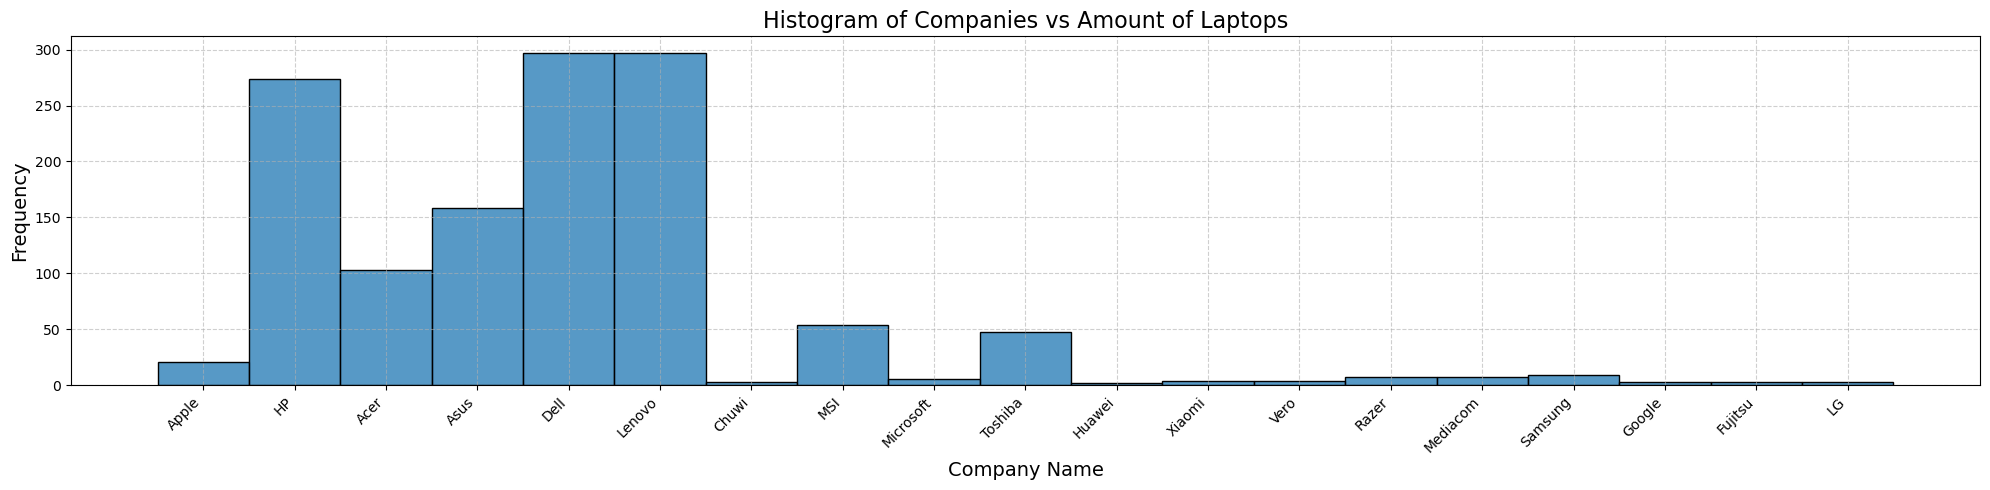

In [13]:
# Create a figure and an axes object
fig, ax = plt.subplots(figsize=(20, 5))

# Plot the data using Seaborn
sns.histplot(df['Company'], kde=False, ax=ax)

# Set labels and title
ax.set_title("Histogram of Companies vs Amount of Laptops", fontsize=16)
ax.set_xlabel("Company Name", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)

# Improve x-axis labels readability
plt.xticks(rotation=45, ha='right')

# Add grid for better readability
ax.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

# Save the figure
fig.savefig("images/histogram_of_companies.png", dpi=300)


In [14]:
### processing data
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
laptop_ID,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [15]:
df.Product.value_counts()

XPS 13                                     30
Inspiron 3567                              29
250 G6                                     21
Legion Y520-15IKBN                         19
Vostro 3568                                19
                                           ..
15-bw007nv (A10-9620P/6GB/128GB/Radeon      1
SmartBook 130                               1
A541NA-GO342 (N3350/4GB/500GB/Linux)        1
17-X047na (i3-6006U/8GB/1TB/W10)            1
V330-15IKB (i5-8250U/4GB/500GB/FHD/W10)     1
Name: Product, Length: 618, dtype: int64

In [16]:
# product name appear once
count =df.Product.value_counts()==1
count.sum()

436

In [17]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
laptop_ID,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [18]:
df.TypeName.value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

In [19]:
df.Ram.dtype

dtype('O')

RAM should be int dtype

In [20]:
df["Ram"] = df["Ram"].str.replace('GB', '')

In [21]:
df.Ram

laptop_ID
1        8
2        8
3        8
4       16
5        8
        ..
1316     4
1317    16
1318     2
1319     6
1320     4
Name: Ram, Length: 1303, dtype: object

In [23]:
df.Ram.dtype

dtype('O')

In [24]:
df["Ram"] = df["Ram"].astype(int)

In [25]:
df.Ram.dtype

dtype('int32')

In [26]:
# lets do the same with weight 
df["Weight"] = df["Weight"].str.replace('kg','')
df['Weight'] = df['Weight'].astype(float)

In [27]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
laptop_ID,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [28]:
# lets work on memroy cell 
df.Memory

laptop_ID
1                 128GB SSD
2       128GB Flash Storage
3                 256GB SSD
4                 512GB SSD
5                 256GB SSD
               ...         
1316              128GB SSD
1317              512GB SSD
1318     64GB Flash Storage
1319                1TB HDD
1320              500GB HDD
Name: Memory, Length: 1303, dtype: object

In [30]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')

In [32]:
df.Memory

laptop_ID
1                 128 SSD
2       128 Flash Storage
3                 256 SSD
4                 512 SSD
5                 256 SSD
              ...        
1316              128 SSD
1317              512 SSD
1318     64 Flash Storage
1319             1000 HDD
1320              500 HDD
Name: Memory, Length: 1303, dtype: object

In [33]:
new2 = df["Memory"].str.split("+", n = 1, expand = True)
df["first"]= new2[0]
df["first"]=df["first"].str.strip()
df["second"]= new2[1]
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)
df['first'] = df['first'].str.replace(r'\D', '')
df["second"].fillna("0", inplace = True)
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)
df['second'] = df['second'].str.replace(r'\D', '')
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)
df["Total_Memory"]=(df["first"]*(df["Layer1HDD"]+df["Layer1SSD"]+df["Layer1Hybrid"]+df["Layer1Flash_Storage"])+df["second"]*(df["Layer2HDD"]+df["Layer2SSD"]+df["Layer2Hybrid"]+df["Layer2Flash_Storage"]))
df["Memory"]=df["Total_Memory"]
df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

C:\Users\sunrise\AppData\Local\Temp\ipykernel_8824\2143976353.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')
C:\Users\sunrise\AppData\Local\Temp\ipykernel_8824\2143976353.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')


In [34]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,...,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage,Total_Memory,HDD,SSD,Hybrid,Flash_Storage
laptop_ID,,,,,,,,,,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,macOS,...,0,0,0,0,0,128,0,128,0,0
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,macOS,...,1,0,0,0,0,128,0,0,0,128
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,No OS,...,0,0,0,0,0,256,0,256,0,0
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,macOS,...,0,0,0,0,0,512,0,512,0,0
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,macOS,...,0,0,0,0,0,256,0,256,0,0


In [35]:
new = df["ScreenResolution"].str.split("x", n = 1, expand = True) 
df["X_res"]= new[0]
df["Y_res"]= new[1]
df["Y_res"]= pd.to_numeric(df["Y_res"])
df["Y_res"]= df["Y_res"].astype(float)
df["X_res"]=(df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x: pd.Series(x).astype(int)).mean(1))
df["X_res"]=pd.to_numeric(df["X_res"])
df["PPI"]=(((df["X_res"]**2+df["Y_res"]**2)**(1/2))/df["Inches"]).astype(float)
df["ScreenResolution"]=(df["X_res"]*df["Y_res"]).astype(float)

In [37]:
# drops all extra coulmns
df=df.drop(['first','second','Layer1HDD','Layer1SSD','Layer1Hybrid','Layer1Flash_Storage','Layer2HDD','Layer2SSD','Layer2Hybrid','Layer2Flash_Storage','Total_Memory'],axis=1)

In [38]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,HDD,SSD,Hybrid,Flash_Storage,X_res,Y_res,PPI
laptop_ID,,,,,,,,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,4096000.0,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,128,0,0,2560.0,1600.0,226.983005
2,Apple,Macbook Air,Ultrabook,13.3,1296000.0,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,0,128,1440.0,900.0,127.677940
3,HP,250 G6,Notebook,15.6,2073600.0,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,No OS,1.86,575.00,0,256,0,0,1920.0,1080.0,141.211998
4,Apple,MacBook Pro,Ultrabook,15.4,5184000.0,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,macOS,1.83,2537.45,0,512,0,0,2880.0,1800.0,220.534624
5,Apple,MacBook Pro,Ultrabook,13.3,4096000.0,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,256,0,0,2560.0,1600.0,226.983005


In [40]:
df.dtypes

Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution    float64
Cpu                  object
Ram                   int32
Memory                int64
Gpu                  object
OpSys                object
Weight              float64
Price_euros         float64
HDD                   int64
SSD                   int64
Hybrid                int64
Flash_Storage         int64
X_res               float64
Y_res               float64
PPI                 float64
dtype: object